In [11]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab9 - DT/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data = df.drop(['id', 'date', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503


In [4]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
X = data.drop('price', axis=1)
y = data['price']

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [7]:
# Create decision tree classifer object
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(dt.get_params())

{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [8]:
print("R-Squared on train dataset = {}".format(dt.score(X_train, y_train).round(3)))
print("R-Squared on test dataset = {}".format(dt.score(X_test, y_test).round(3)))

R-Squared on train dataset = 0.999
R-Squared on test dataset = 0.572


In [9]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.head()

,Actual,Predicted
15544,459000.0,426500.0
17454,445000.0,270000.0
21548,1057000.0,389000.0
3427,732350.0,395000.0
8809,235000.0,398000.0


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred).round(2))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred).round(2))  
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)).round(2))

Mean Squared Error:  73793482004.77
Mean Absolute Error:  158419.95
Root Mean Squared Error:  271649.56


**Important Features**

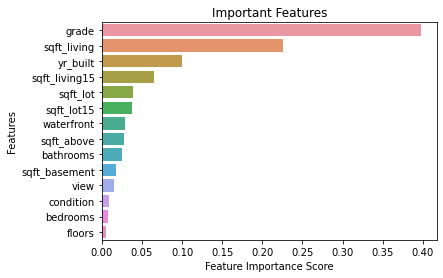

In [13]:
import matplotlib.pyplot as plt
feature_imp = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
sns.barplot(x=feature_imp[:15], y=feature_imp.index[:15])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

**Grid Search CV**

In [24]:
dt = DecisionTreeRegressor()

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['mse', 'mae'],
              'max_depth': [2, 3, 5, 10, 50], 
              'max_leaf_nodes': [5, 20, 100],
             }

# Run the grid search
grid_search_dt = GridSearchCV(dt, parameters, cv=5)

grid_search_dt.fit(X_train,y_train)
best_parameters_dt = grid_search_dt.best_params_  
best_score_dt = grid_search_dt.best_score_ 
print(best_parameters_dt)
print(best_score_dt)

y_pred_1 = grid_search_dt.predict(X_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_1).round(2))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred_1).round(2))  
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred_1)).round(2))

{'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 100}
0.6316708846171737
Mean Squared Error:  57884370406.33
Mean Absolute Error:  134688.44
Root Mean Squared Error:  240591.71


In [25]:
df3 = pd.DataFrame({'Actual': y_test, 'Old Predicted': y_pred, 'New Predicted': y_pred_1.round(2)})
df3.head()

,Actual,Old Predicted,New Predicted
15544,459000.0,426500.0,710000.0
17454,445000.0,270000.0,270000.0
21548,1057000.0,389000.0,727499.5
3427,732350.0,395000.0,605000.0
8809,235000.0,398000.0,253750.0
